In [ ]:
# Problem 2: Verify Q1 from last week using Qiskit. Assume \psi_1 = 1/\sqrt(3)|0> + \sqrt(2/3)|1>,
# and \psi_2 = \sqrt(2/3)|0> - 1/sqrt(3)|1>. Write a Qiskit code to measure the state |+> in this basis.
# Verify that you do get the probability which Poulami showed via mathematical calculation

In [1]:
import numpy as np
import qiskit
import qiskit.quantum_info
import qiskit.visualization
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

In [2]:
# Choosing alpha and beta
alpha = 1/np.sqrt(3)
beta = np.sqrt(2/3)

In [3]:
print(f"alpha = {alpha}")
print(f"beta = {beta}")
print(alpha**2+beta**2)

alpha = 0.5773502691896258
beta = 0.816496580927726
1.0


In [11]:
psi_1 = [alpha,beta]
psi_2 = [beta,-alpha]

# unitary_transformation to measure in |ψ₁⟩ and |ψ₂⟩ basis
unitary_transformation = [psi_1,psi_2]

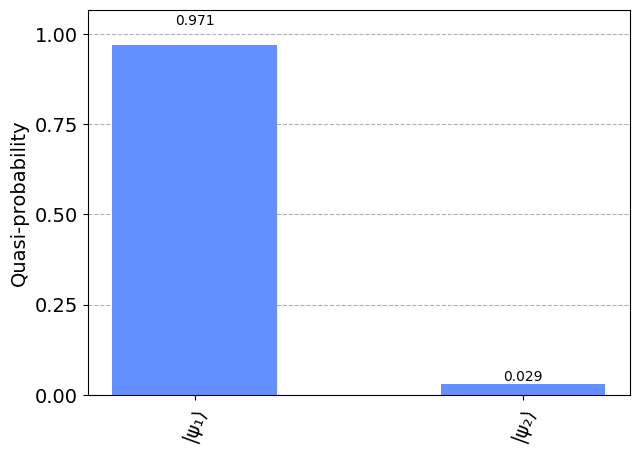

In [6]:
predictions_count = {
    '|ψ₁⟩' : ((alpha+beta)**2)/2,
    '|ψ₂⟩' : ((beta-alpha)**2)/2
}
qiskit.visualization.plot_histogram(predictions_count)

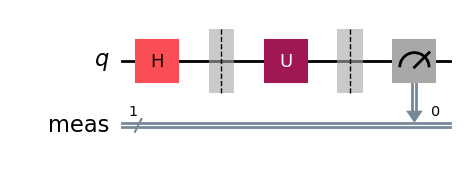

In [7]:
qc = qiskit.QuantumCircuit(1)

#  0 --> +
qc.h(0)

qc.barrier()

qc.unitary(unitary_transformation,0,'U')

qc.measure_all()

qc.draw('mpl')

0.97025


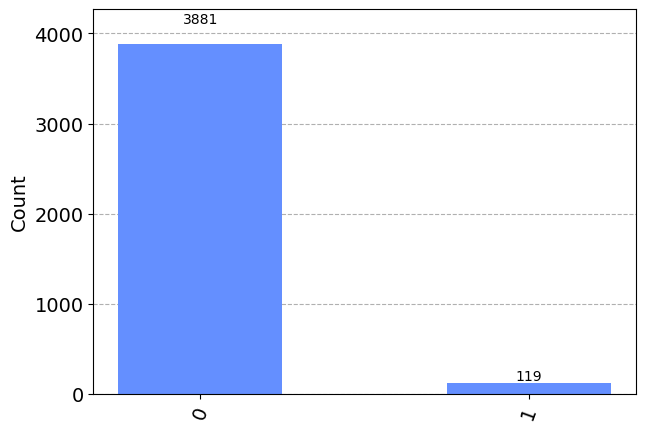

In [9]:
from qiskit_aer import AerSimulator
counts=AerSimulator().run(qc,shots=4000).result().get_counts()
print(counts['0']/(counts['0']+counts['1']))
qiskit.visualization.plot_histogram(counts)

In [10]:
service = QiskitRuntimeService()
backend = service.least_busy()
sampler = Sampler(backend=backend)
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists[0].binary_probabilities()
qiskit.visualization.plot_histogram(counts)

C:\Users\abhig\AppData\Local\Temp\ipykernel_16260\3170161147.py:3: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(backend=backend)


TranspilerError: "The number of qubits for Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) does not match the number of qubits in the properties dictionary: (0,)"